#### Intials

In [402]:
# Cuántos nodos puedo tener donde puedo calcular la verosimilitud sin que explote?
d = 15
print(f"Para {d} nodos, tengo {2**d} combinaciones posibles para el vector X")

Para 15 nodos, tengo 32768 combinaciones posibles para el vector X


Usando la FVBM, comparamos lo que tarda en calcular la verosimilitud (L) con la pseudo-verosimilitud (PL)

$\Theta = \{\theta, b\}$

$b = (b_1, b_2,\dots,b_d)$

$\theta = (\theta_{i,j})$ para $i\in\{1,\dots,d\}$ y $j<i$

In [560]:
import numpy as np
import models.fvbm as fvbm
from random import random


d = 10
theta = {}
b = {}
for i in range(d):
    for j in range(i):
        theta[(i,j)] = (random()-0.5)*4

assert(len(theta) == d*(d-1)/2)

for i in range(d):
    b[i] = (random()-0.5)*4
b_vector = np.array(list(b.values()))
assert(len(b) == d)

In [586]:
from importlib import reload
reload(fvbm)

fvbm1 = fvbm.FVBM({"theta":theta, "b":b}, d=d)

fvbm1.sample(10000)

res = fvbm1.fit()

sum(fvbm1.params_diff)

np.float64(4.832309802302639)

In [592]:
reload(fvbm)
from tqdm import tqdm


d = 10
theta = {}
b = {}
for i in range(d):
    for j in range(i):
        theta[(i,j)] = (random()-0.5)*4

assert(len(theta) == d*(d-1)/2)

for i in range(d):
    b[i] = (random()-0.5)*4
b_vector = np.array(list(b.values()))
assert(len(b) == d)

n = [2**7,2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14]
MAE = []
for n_ in tqdm(n):
    fvbm1 = fvbm.FVBM({"theta":theta, "b":b}, d=d)
    fvbm1.sample(n_)
    res = fvbm1.fit()
    MAE.append(sum(fvbm1.params_diff).copy())

100%|██████████| 8/8 [00:05<00:00,  1.39it/s]


<Axes: >

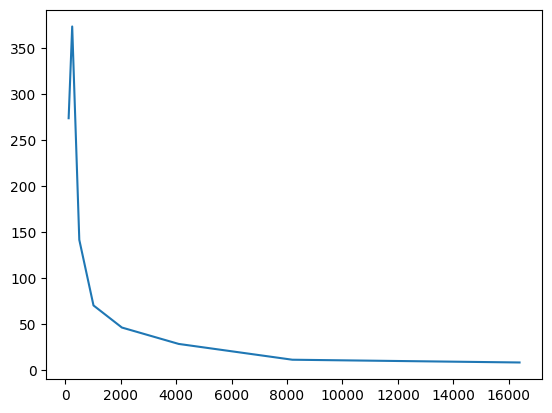

In [593]:
import seaborn as sns

sns.lineplot(x=n, y=MAE)